### Importación de datos



In [48]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [41]:
import pandas as pd

# Agregar columna Tienda a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unificar todos los datos en un solo DataFrame
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificación
df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [42]:
facturacion = (
    df.groupby('Tienda')['Precio']
    .sum()
    .sort_values(ascending=False)
)

facturacion


,Precio
Tienda,
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


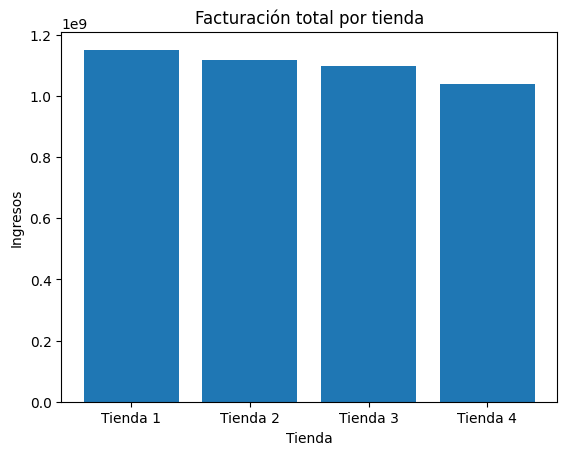

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(facturacion.index, facturacion.values)
plt.title('Facturación total por tienda')
plt.ylabel('Ingresos')
plt.xlabel('Tienda')
plt.show()



# 2. Ventas por categoría

In [55]:
import pandas as pd

# Diccionario con las tiendas (código base Alura)
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ventas_por_categoria = {}

for nombre_tienda, df in tiendas.items():

    tabla_categoria = (
        df['Categoría del Producto']
        .value_counts()
        .to_frame(name='Cantidad de ventas')
    )

    ventas_por_categoria[nombre_tienda] = tabla_categoria

# Mostrar tablas sin numeración
for nombre_tienda, tabla in ventas_por_categoria.items():
    print(f'\nVENTAS POR CATEGORÍA – {nombre_tienda.upper()}')
    display(tabla)





VENTAS POR CATEGORÍA – TIENDA 1


,Cantidad de ventas
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171



VENTAS POR CATEGORÍA – TIENDA 2


,Cantidad de ventas
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181



VENTAS POR CATEGORÍA – TIENDA 3


,Cantidad de ventas
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177



VENTAS POR CATEGORÍA – TIENDA 4


,Cantidad de ventas
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


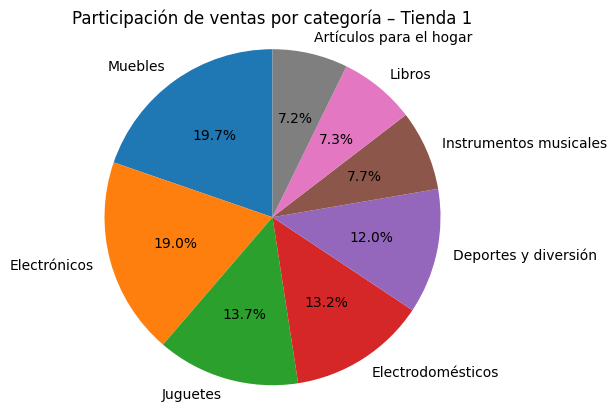

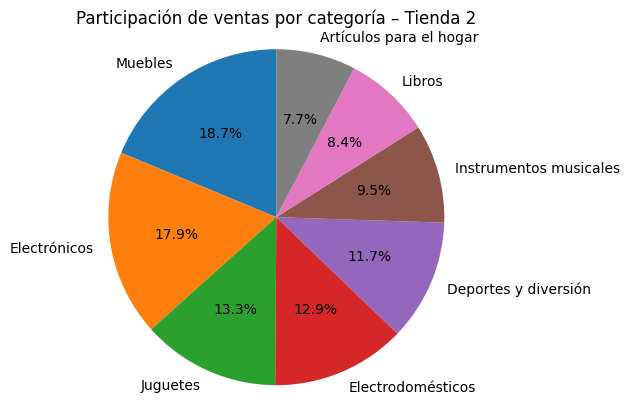

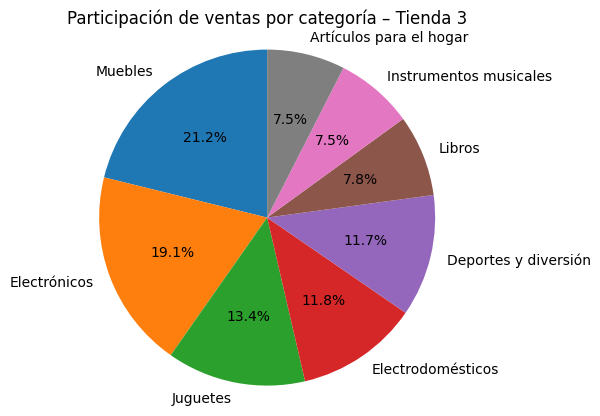

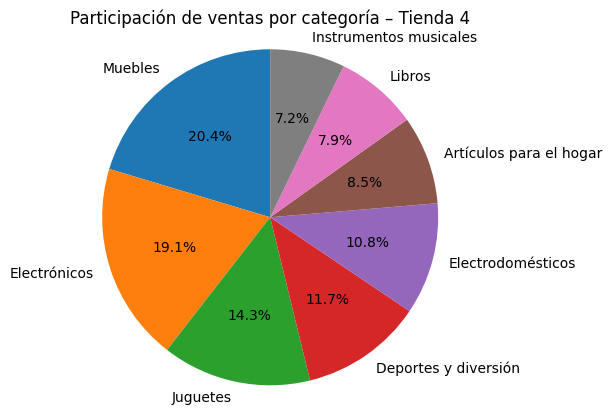

In [56]:
import matplotlib.pyplot as plt

for nombre_tienda, tabla in ventas_por_categoria.items():

    plt.figure()

    plt.pie(
        tabla['Cantidad de ventas'],
        labels=tabla.index,
        autopct='%1.1f%%',
        startangle=90
    )

    plt.title(f'Participación de ventas por categoría – {nombre_tienda}')
    plt.axis('equal')  # Asegura que el gráfico sea circular

    plt.show()



# 3. Calificación promedio de la tienda


In [60]:
import pandas as pd

tabla_calificacion = (
    pd.DataFrame.from_dict(
        calificacion_promedio,
        orient='index',
        columns=['Calificación promedio']
    )
    .sort_values(by='Calificación promedio', ascending=False)
)

display(tabla_calificacion)


,Calificación promedio
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


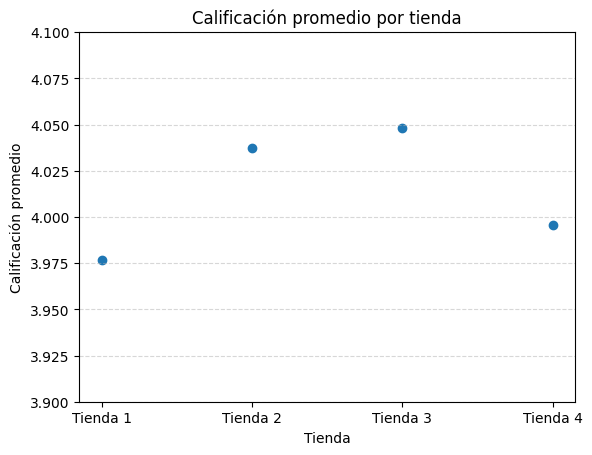

In [66]:
import matplotlib.pyplot as plt

# Preparar datos
tiendas = list(calificacion_promedio.keys())
valores = list(calificacion_promedio.values())

plt.figure()

plt.scatter(tiendas, valores)

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')

# Acotar el eje Y para resaltar diferencias pequeñas
plt.ylim(3.9, 4.1)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()




# 4. Productos más y menos vendidos

In [67]:
# FUNCIÓN DE CÁLCULO CON NOMBRE EXPLÍCITO
def calcular_productos_mas_menos(df, nombre_tienda, n=5):
    conteo = df['Producto'].value_counts()

    mas_vendidos = conteo.head(n)
    mas_vendidos.name = f"{nombre_tienda} – Productos más vendidos"

    menos_vendidos = conteo.tail(n)
    menos_vendidos.name = f"{nombre_tienda} – Productos menos vendidos"

    return mas_vendidos, menos_vendidos


# CÁLCULO POR TIENDA
mas_t1, menos_t1 = calcular_productos_mas_menos(tienda, "Tienda 1")
mas_t2, menos_t2 = calcular_productos_mas_menos(tienda2, "Tienda 2")
mas_t3, menos_t3 = calcular_productos_mas_menos(tienda3, "Tienda 3")
mas_t4, menos_t4 = calcular_productos_mas_menos(tienda4, "Tienda 4")

# VALIDACIÓN (opcional)
display(mas_t1, menos_t1)
display(mas_t2, menos_t2)
display(mas_t3, menos_t3)
display(mas_t4, menos_t4)



,Tienda 1 – Productos más vendidos
Producto,
Microondas,60
TV LED UHD 4K,60
Armario,60
Secadora de ropa,58
Mesa de noche,56


,Tienda 1 – Productos menos vendidos
Producto,
Ciencia de datos con Python,39
Pandereta,36
Olla de presión,35
Auriculares con micrófono,33
Celular ABXY,33


,Tienda 2 – Productos más vendidos
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Guitarra acústica,58
Pandereta,58


,Tienda 2 – Productos menos vendidos
Producto,
Auriculares,37
Sillón,35
Mesa de comedor,34
Impresora,34
Juego de mesa,32


,Tienda 3 – Productos más vendidos
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


,Tienda 3 – Productos menos vendidos
Producto,
Guitarra eléctrica,38
Set de vasos,36
Mochila,36
Microondas,36
Bloques de construcción,35


,Tienda 4 – Productos más vendidos
Producto,
Cama box,62
Cubertería,59
Dashboards con Power BI,56
Cama king,56
Carrito de control remoto,55


,Tienda 4 – Productos menos vendidos
Producto,
Refrigerador,38
Ciencia de datos con Python,38
Guitarra acústica,37
Armario,34
Guitarra eléctrica,33


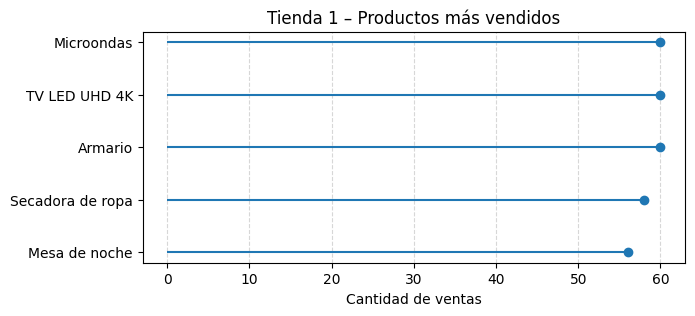

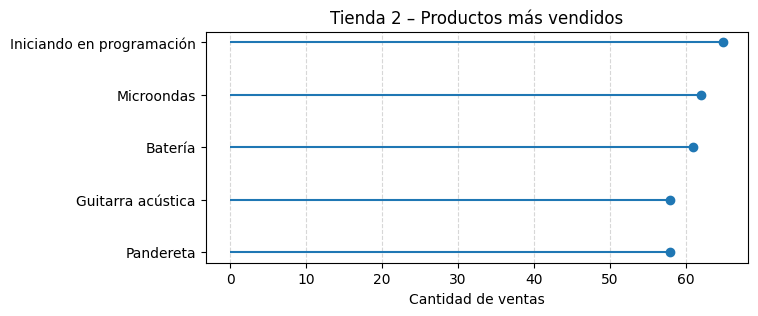

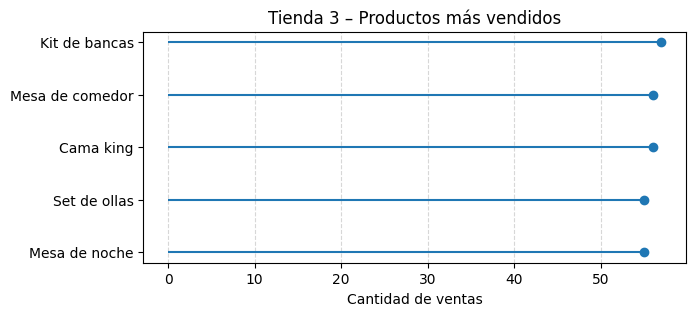

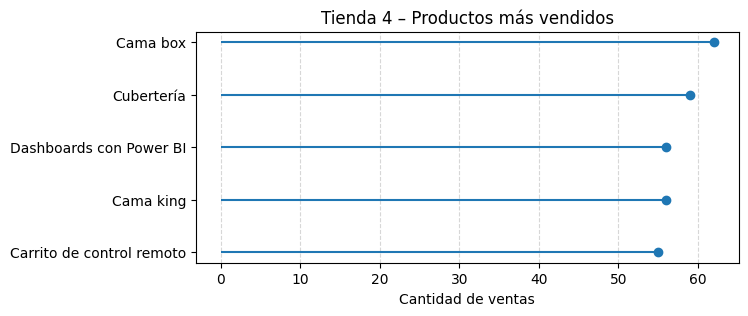

In [37]:
import matplotlib.pyplot as plt

def grafico_productos_mas_vendidos(series):
    productos = series.index
    valores = series.values

    plt.figure(figsize=(7,3))
    plt.hlines(productos, xmin=0, xmax=valores)
    plt.plot(valores, productos, "o")

    plt.title(series.name)
    plt.xlabel("Cantidad de ventas")

    # CLAVE: invertir eje Y para que el mayor quede arriba
    plt.gca().invert_yaxis()

    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()


# TIENDA 1
grafico_productos_mas_vendidos(mas_t1)

# TIENDA 2
grafico_productos_mas_vendidos(mas_t2)

# TIENDA 3
grafico_productos_mas_vendidos(mas_t3)

# TIENDA 4
grafico_productos_mas_vendidos(mas_t4)


# 5. Envío promedio por tienda

In [70]:
import pandas as pd

tabla_envio = (
    pd.DataFrame.from_dict(
        envio_promedio,
        orient='index',
        columns=['Costo promedio de envío']
    )
    .sort_values(by='Costo promedio de envío', ascending=True)
)

display(tabla_envio)



,Costo promedio de envío
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


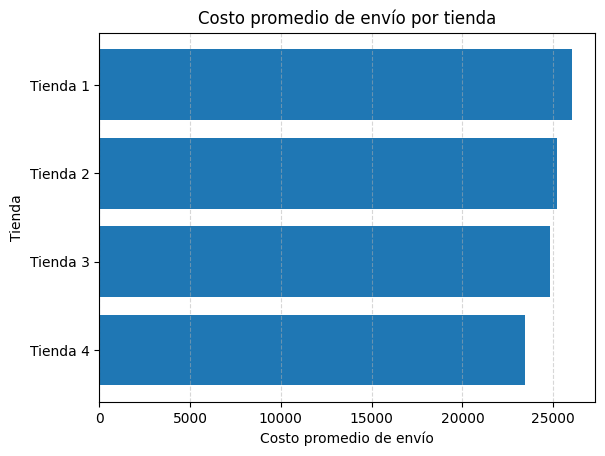

In [71]:
import matplotlib.pyplot as plt

# Usar la tabla ya ordenada
tiendas = tabla_envio.index
costos = tabla_envio['Costo promedio de envío']

plt.figure()

plt.barh(tiendas, costos)

plt.title('Costo promedio de envío por tienda')
plt.xlabel('Costo promedio de envío')
plt.ylabel('Tienda')

plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()



## **EXTRA - DISTRIBUCION GEOGRAFICA DE VENTAS**

In [76]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# -----------------------------
# CARGA DE DATOS
# -----------------------------
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# -----------------------------
# IDENTIFICAR TIENDAS
# -----------------------------
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# -----------------------------
# UNIFICAR DATA
# -----------------------------
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# -----------------------------
# MAPA DE CALOR GENERAL (TODAS LAS TIENDAS)
# -----------------------------
datos_mapa = df[['lat', 'lon', 'Precio']].dropna()

mapa_general = folium.Map(
    location=[datos_mapa['lat'].mean(), datos_mapa['lon'].mean()],
    zoom_start=11
)

HeatMap(
    data=datos_mapa.values,
    radius=12,
    blur=15,
    max_zoom=13
).add_to(mapa_general)

display(mapa_general)

# -----------------------------
# MAPAS DE CALOR POR TIENDA
# -----------------------------
for tienda in df['Tienda'].unique():

    datos_tienda = (
        df[df['Tienda'] == tienda]
        [['lat', 'lon', 'Precio']]
        .dropna()
    )

    mapa_tienda = folium.Map(
        location=[datos_tienda['lat'].mean(), datos_tienda['lon'].mean()],
        zoom_start=11
    )

    HeatMap(
        data=datos_tienda.values,
        radius=12,
        blur=15,
        max_zoom=13
    ).add_to(mapa_tienda)

    print(f"Mapa de calor de ventas — {tienda}")
    display(mapa_tienda)


Mapa de calor de ventas — Tienda 1


Mapa de calor de ventas — Tienda 2


Mapa de calor de ventas — Tienda 3


Mapa de calor de ventas — Tienda 4


**Informe Final de Análisis de Ventas**

*Recomendación de tienda para el Sr. Juan*
<br><br>
**1. Introducción**

El presente informe tiene como objetivo analizar el desempeño de cuatro tiendas a partir de un conjunto de datos de ventas, con el fin de recomendar al Sr. Juan en cuál de ellas le conviene vender sus productos.

El análisis considera múltiples factores relevantes para la toma de decisiones comerciales, entre ellos: facturación total, comportamiento de ventas por categoría, calificación promedio de los clientes, productos más y menos vendidos y costos de envío promedio por tienda.

La evaluación se apoya en los resultados obtenidos mediante el procesamiento de datos y la generación de visualizaciones estadísticas desarrolladas en Google Colab.
<br><br>
**2. Análisis de resultados**
<br><br>
**2.1 Facturación total por tienda**

Los ingresos totales obtenidos por cada tienda muestran el siguiente comportamiento:

* Tienda 1: $1.150.880.400

* Tienda 2: $1.116.343.500

* Tienda 3: $1.098.019.600

* Tienda 4: $1.038.375.700

<br><br>
La Tienda 1 presenta la mayor facturación total, lo que indica un alto volumen de ventas. La Tienda 4 presenta la menor facturación total, lo que constituye una primera señal de menor desempeño económico en comparación con las demás. Sin embargo, las diferencias entre las tiendas no son excesivamente amplias, por lo que resulta necesario complementar este análisis con otros indicadores para una decisión más equilibrada.
<br><br>

**2.2 Ventas por categoría de producto**

El comportamiento de ventas por categoría presenta patrones similares, pero con diferencias relevantes entre tiendas:
<br><br>
**Tienda 1**

Predominan Muebles y Electrónicos, seguidos por Juguetes y Electrodomésticos.
Las categorías con menor volumen son Artículos para el hogar y Libros.
<br><br>
**Tienda 2**

Mantiene un patrón similar, aunque con menor volumen total que Tienda 1.
Destaca un mayor peso relativo de Instrumentos musicales.
<br><br>
**Tienda 3**

Es la tienda con mayor volumen de ventas en Muebles, superando al resto.
Presenta una distribución más equilibrada entre categorías medias.
<br><br>
**Tienda 4**

A pesar de buenos números en Muebles y Electrónicos, muestra menores ventas en Electrodomésticos e Instrumentos musicales, lo que reduce su diversificación comercial.
En términos comparativos, Tienda 4 presenta menor profundidad y equilibrio en su mix de categorías, lo que limita su potencial de crecimiento.
<br><br>
**2.3 Calificación promedio de los clientes**

Las calificaciones promedio obtenidas son las siguientes:

* Tienda 1: 3,98

* Tienda 2: 4,04

* Tienda 3: 4,05

* Tienda 4: 4,00
<br><br>
Si bien las diferencias son leves, Tienda 4 no destaca positivamente, ubicándose por debajo de Tienda 2 y Tienda 3 en percepción de satisfacción del cliente.

**2.4 Productos más y menos vendidos por tienda**
<br><br>
**Tienda 1**

Más vendidos: Microondas, TV LED UHD 4K, Armario
Menos vendidos: Ciencia de datos con Python, Pandereta, Celular ABXY
<br><br>
**Tienda 2**

Más vendidos: Iniciando en programación, Microondas, Batería
Menos vendidos: Juego de mesa, Impresora, Mesa de comedor
<br><br>
**Tienda 3**

Más vendidos: Kit de bancas, Mesa de comedor, Cama king
Menos vendidos: Bloques de construcción, Microondas, Mochila
<br><br>
**Tienda 4**

Más vendidos: Cama box, Cubertería, Dashboards con Power BI
Menos vendidos: Refrigerador, Ciencia de datos con Python, Guitarra eléctrica

<br><br>
**2.5 Costo promedio de envío por tienda**

El costo promedio de envío presenta el siguiente comportamiento:

* Tienda 4: $23.459

* Tienda 3: $24.806

* Tienda 2: $25.216

* Tienda 1: $26.019
<br><br>

**2.6 Análisis geográfico de ventas (Extra)**

El análisis espacial, mediante mapas de calor, permitió identificar que:

* Las ventas de Tienda 4 presentan menor concentración geográfica, con puntos de compra más dispersos.

* Las tiendas con mejor desempeño muestran clústeres claros en zonas de alta actividad comercial.

* No se evidencian regiones donde Tienda 4 tenga una ventaja territorial significativa.


**3. Conclusión y recomendación final**

Tras analizar de forma integral los ingresos, el comportamiento por categoría, la satisfacción del cliente, la rotación de productos, los costos de envío y la distribución geográfica de las ventas, se concluye que:

**La Tienda 4 es la opción más recomendable para ser vendida**.

*Justificación:*

* Presenta la menor facturación total.

* Tiene un mix de categorías menos equilibrado.

* No destaca en calificación de clientes.

* No cuenta con una ventaja geográfica relevante que mejore su desempeño.

En consecuencia, vender la Tienda 4 permitiría al Sr. Juan liberar capital con el menor impacto negativo en el rendimiento global de la cadena, facilitando una decisión estratégica sólida y basada en datos.
